# Code nhân hai ma trận C:

In [26]:
%%file c_matrix.c
#define _CRT_SECURE_NO_WARNINGS
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

// ham tao ma tran
double** createMatrix(int n) {
    double** matrix = (double**)malloc(n * sizeof(double*));
    for (int i = 0; i < n; i++) {
        matrix[i] = (double*)malloc(n * sizeof(double));
    }
    return matrix;
}

// ham dien ma tran ngau nhien
void fillRandomMatrix(double** matrix, int n) {
    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            matrix[i][j] = rand();
        }
    }
}

int main() {

    srand(time(0)); // bo tao so ngau nhien

    double c_time[3] = { 0 }; // khai bao mang tinh thoi gian


    int size[3] = { 10, 100, 1000 }; // khai bao mang kich thuoc

    // nhan hai ma  tran
    for (int t = 0; t < 3; t++) {
        double** A = createMatrix(size[t]);
        fillRandomMatrix(A, size[t]);

        double** B = createMatrix(size[t]);
        fillRandomMatrix(B, size[t]);

        double** result = createMatrix(size[t]);

        clock_t begin = clock();
        for (int i = 0; i < size[t]; i++) {
            for (int j = 0; j < size[t]; j++) {
                for (int k = 0; k < size[t]; k++) {
                    result[i][j] += (A[i][k] * B[k][j]);
                }
            }

        }
        
        // giai phong bo nho
        for (int i = 0; i < size[t]; i++) {
            free(A[i]);
            free(B[i]);
            free(result[i]);
        }
        free(A);
        free(B);
        free(result);
        clock_t end = clock();
        double time_spent = (double)(end - begin) / CLOCKS_PER_SEC;
        c_time[t] = time_spent;

    }

    // ghi ket qua
    for (int t = 0; t < 3; t++) {
        printf("%f ", c_time[t]);
    }



    return 0;
}

Overwriting c_matrix.c


## Sử dụng bash cmd và gcc để thực thi chương trình C

In [27]:
%%script bash
gcc -o myprogram c_matrix.c
./myprogram

0.000005 0.003580 6.237523 

# Code nhân hai ma trận Python

In [28]:
# thêm thư viện
import numpy as np
import time
import matplotlib.pyplot as plt

In [29]:
# hàm nhân ma trận python thuần

def matrix_multiply_python(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

In [30]:
# khai báo từng kích thước ma trận
matrix_sizes = [10, 100, 1000]

In [31]:
# thực hiện tính toán nhân ma trận
python_times = []
numpy_times = []
numba_times = []

# lấy thời gian nhân ma trận của C
output = get_ipython().getoutput('./myprogram')
c_times = output[0].split()
c_times = [float(element) for element in c_times]

for size in matrix_sizes:
    matrix_A = np.random.rand(size, size)
    matrix_B = np.random.rand(size, size)
    
    # nhân ma trận python
    start_time = time.time()
    matrix_multiply_python(matrix_A, matrix_B)
    end_time = time.time()
    python_times.append(end_time - start_time)
    
    # nhân ma trận numpy
    start_time = time.time()
    np.dot(matrix_A, matrix_B)
    end_time = time.time()
    numpy_times.append(end_time - start_time)

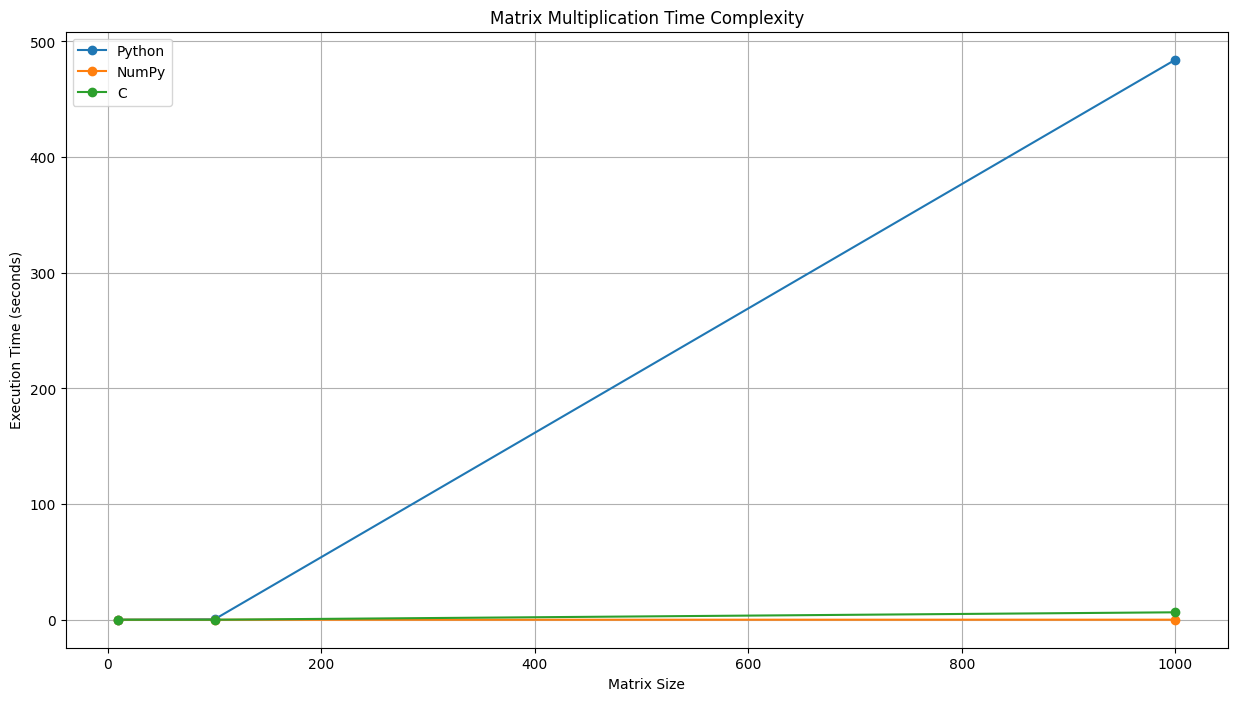

In [32]:
# xuất đồ thị thể hiện độ phức tạp thời gian của Python, NumPy và C
plt.figure(figsize = (15,8))

plt.plot(matrix_sizes, python_times, marker='o', label='Python')
plt.plot(matrix_sizes, numpy_times, marker='o', label='NumPy')
plt.plot(matrix_sizes, c_times, marker='o', label='C')
plt.title("Matrix Multiplication Time Complexity")
plt.xlabel("Matrix Size")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)

# xuất đồ thị ra màn hình
plt.show()

# Đánh giá thuật toán
    - Như ta thấy ở trong đồ thị, thời gian chạy của python tuyến tính với kích thước ma trận, ma trận càng lớn thời gian càng lớn.
    - Numpy và C thì khoảng thời gian chạy theo kích thước tăng dần của ma trận thì thời gian chạy như nhau và rất nhanh (hầu như là bằng 0).
    - Sở dĩ tốc độ chạy của numpy nhanh hơn python thuần vì:
        1. C là ngôn ngữ biên dịch, nghĩa là sẽ dịch qua mã máy trước khi thực thi chương trình nên thời gian chạy rất nhanh.
        2. NumPy được viết hầu hết bằng C và sử dụng thư viện BLAS (Basic Linear Algebra Subprograms), giúp tối ưu hóa việc thực thi thao tác trên ma trận.
        3. Python là ngôn ngữ thông dịch (dịch code tại thời điểm đang chạy) nên nó tốn thời gian hơn là ngôn ngữ biên dịch (dịch code trước khi chạy), là ngôn ngữ bậc cao được sử dụng cho các tác vụ chung nhất của lập trình nên không có sự tối ưu thao tác trên ma trận như NumPy.